In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#подключаем библиотеки

In [2]:
df = pd.read_csv("Crop_recommendation.csv")
df.head()
#читаем датасет и выводим его

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [3]:
df.shape
#выяснем сколько колонок в таблице

(2200, 8)

In [4]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

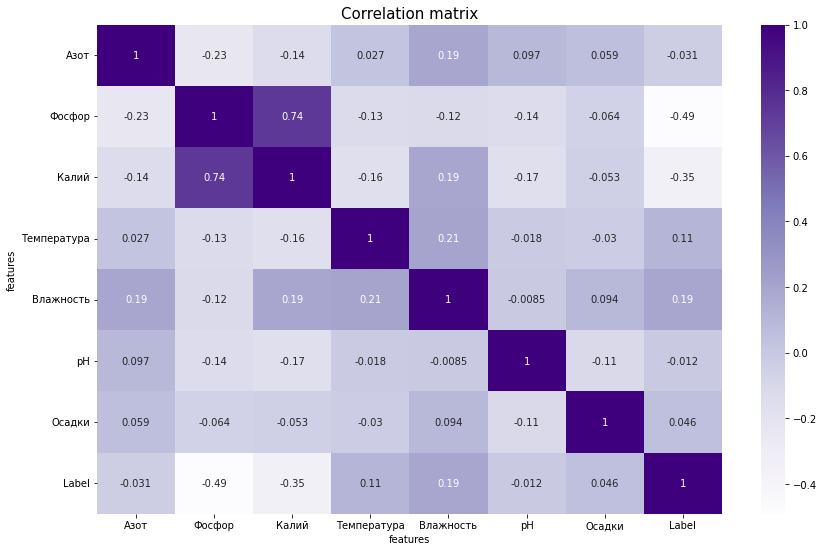

In [27]:
#Матрица корреляции
fig, ax = plt.subplots(1, 1, figsize=(14, 9))
sns.heatmap(df.corr(), annot=True,cmap='Purples')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation matrix', fontsize = 15, c='black')
plt.show()

In [35]:
columns = df.columns[:-1]

In [5]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.columns = ['Азот','Фосфор','Калий','Температура','Влажность','pH','Осадки','Label']
#разделяем на колонки датасет по веществам

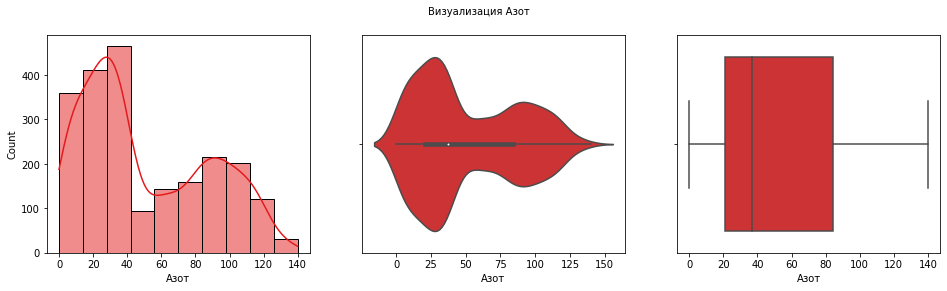

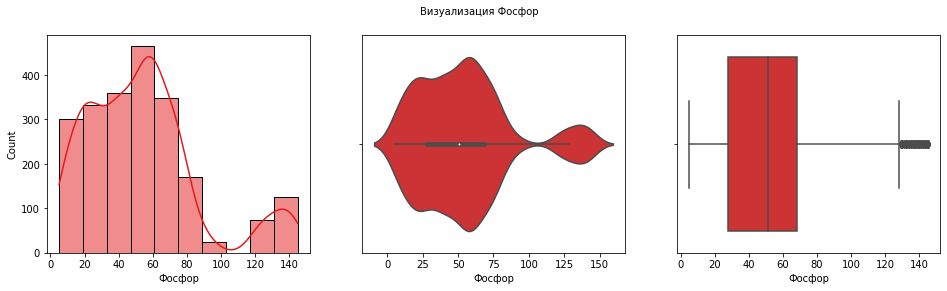

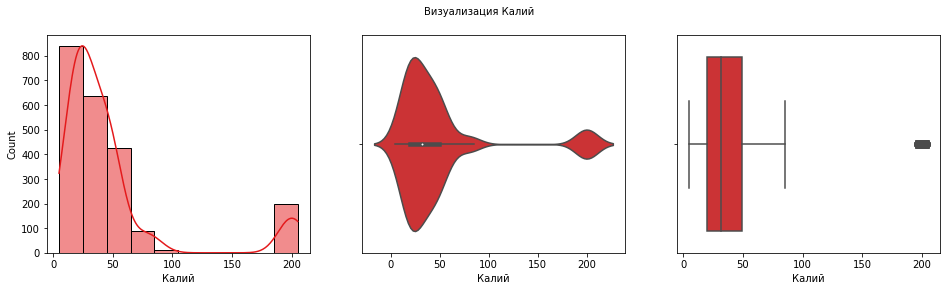

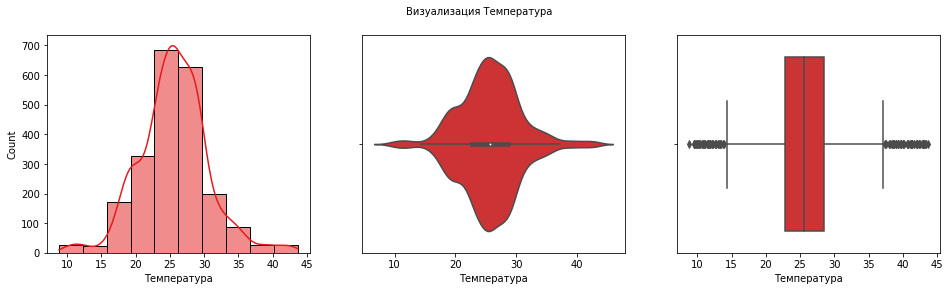

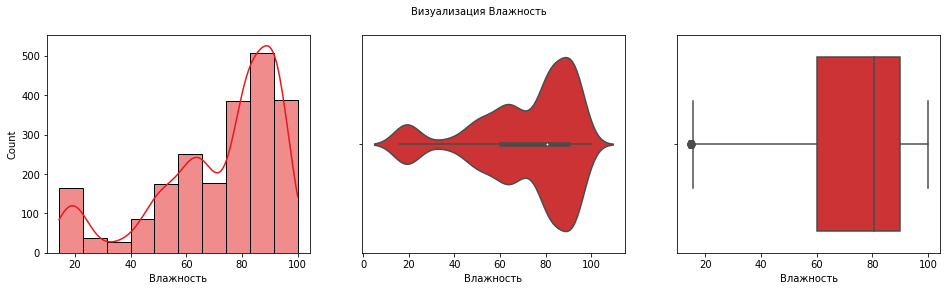

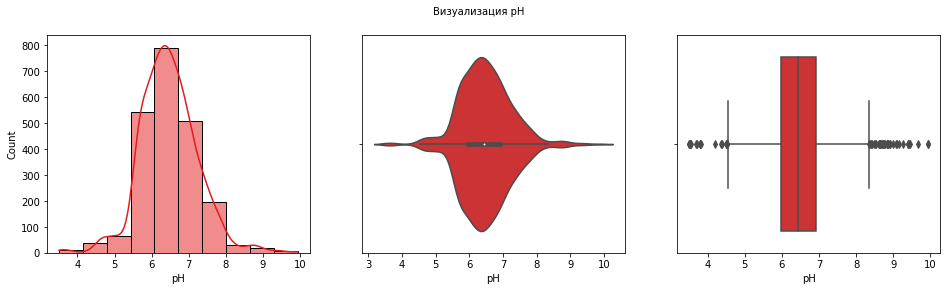

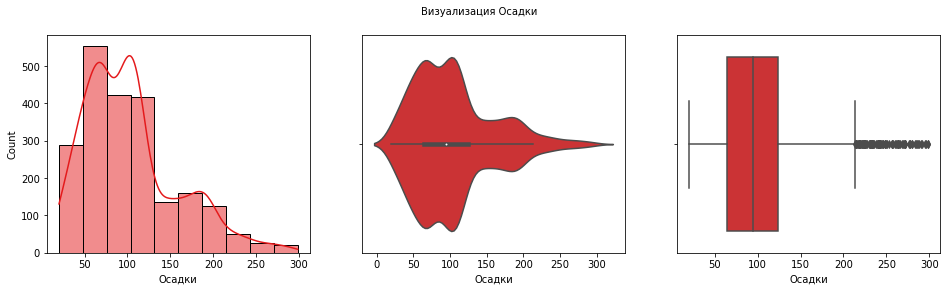

In [9]:

sns.set_palette("Set1")
for i in df.columns[:-1]:
    fig,ax=plt.subplots(1,3,figsize=(16,4))
    sns.histplot(data=df,x=i,kde=True,bins=10,ax=ax[0])
    sns.violinplot(data=df,x=i,ax=ax[1])
    sns.boxplot(data=df,x=i,ax=ax[2])
    plt.suptitle(f'Визуализация {i}',size=10)

#создаем визуализацию данных из датасета

In [10]:
grouped = df.groupby(by='Label').mean().reset_index() #группируем по продукту

In [11]:
grouped

Label    Азот  Фосфор   Калий  Температура  Влажность        pH  \
0         apple   20.80  134.22  199.89    22.630942  92.333383  5.929663   
1        banana  100.23   82.01   50.05    27.376798  80.358123  5.983893   
2     blackgram   40.02   67.47   19.24    29.973340  65.118426  7.133952   
3      chickpea   40.09   67.79   79.92    18.872847  16.860439  7.336957   
4       coconut   21.98   16.93   30.59    27.409892  94.844272  5.976562   
5        coffee  101.20   28.74   29.94    25.540477  58.869846  6.790308   
6        cotton  117.77   46.24   19.56    23.988958  79.843474  6.912675   
7        grapes   23.18  132.53  200.11    23.849575  81.875228  6.025937   
8          jute   78.40   46.86   39.99    24.958376  79.639864  6.732778   
9   kidneybeans   20.75   67.54   20.05    20.115085  21.605357  5.749411   
10       lentil   18.77   68.36   19.41    24.509052  64.804785  6.927932   
11        maize   77.76   48.44   19.79    22.389204  65.092249  6.245190   
12        mango   20.07   27.18   29.92    31.208770  50.156573  5.766373   
13    mothbeans   21.44   48.01   20.23    28.194920  53.160418  6.831174   
14     mungbean   20.99   47.28   19.87    28.525775  85.499975  6.723957   
15    muskmelon  100.32   17.72   50.08    28.663066  92.342802  6.358805   
16       orange   19.58   16.55   10.01    22.765725  92.170209  7.016957   
17       papaya   49.88   59.05   50.04    33.723859  92.403388  6.741442   
18   pigeonpeas   20.73   67.73   20.29    27.741762  48.061633  5.794175   
19  pomegranate   18.87   18.75   40.21    21.837842  90.125504  6.429172   
20         rice   79.89   47.58   39.87    23.689332  82.272822  6.425471   
21   watermelon   99.42   17.00   50.22    25.591767  85.160375  6.495778   

        Осадки  
0   112.654779  
1   104.626980  
2    67.884151  
3    80.058977  
4   175.686646  
5   158.066295  
6    80.398043  
7    69.611829  
8   174.792798  
9   105.919778  
10   45.680454  
11   84.766988  
12   94.704515  
13   51.198487  
14   48.403601  
15   24.689952  
16  110.474969  
17  142.627839  
18  149.457564  
19  107.528442  
20  236.181114  
21   50.786219

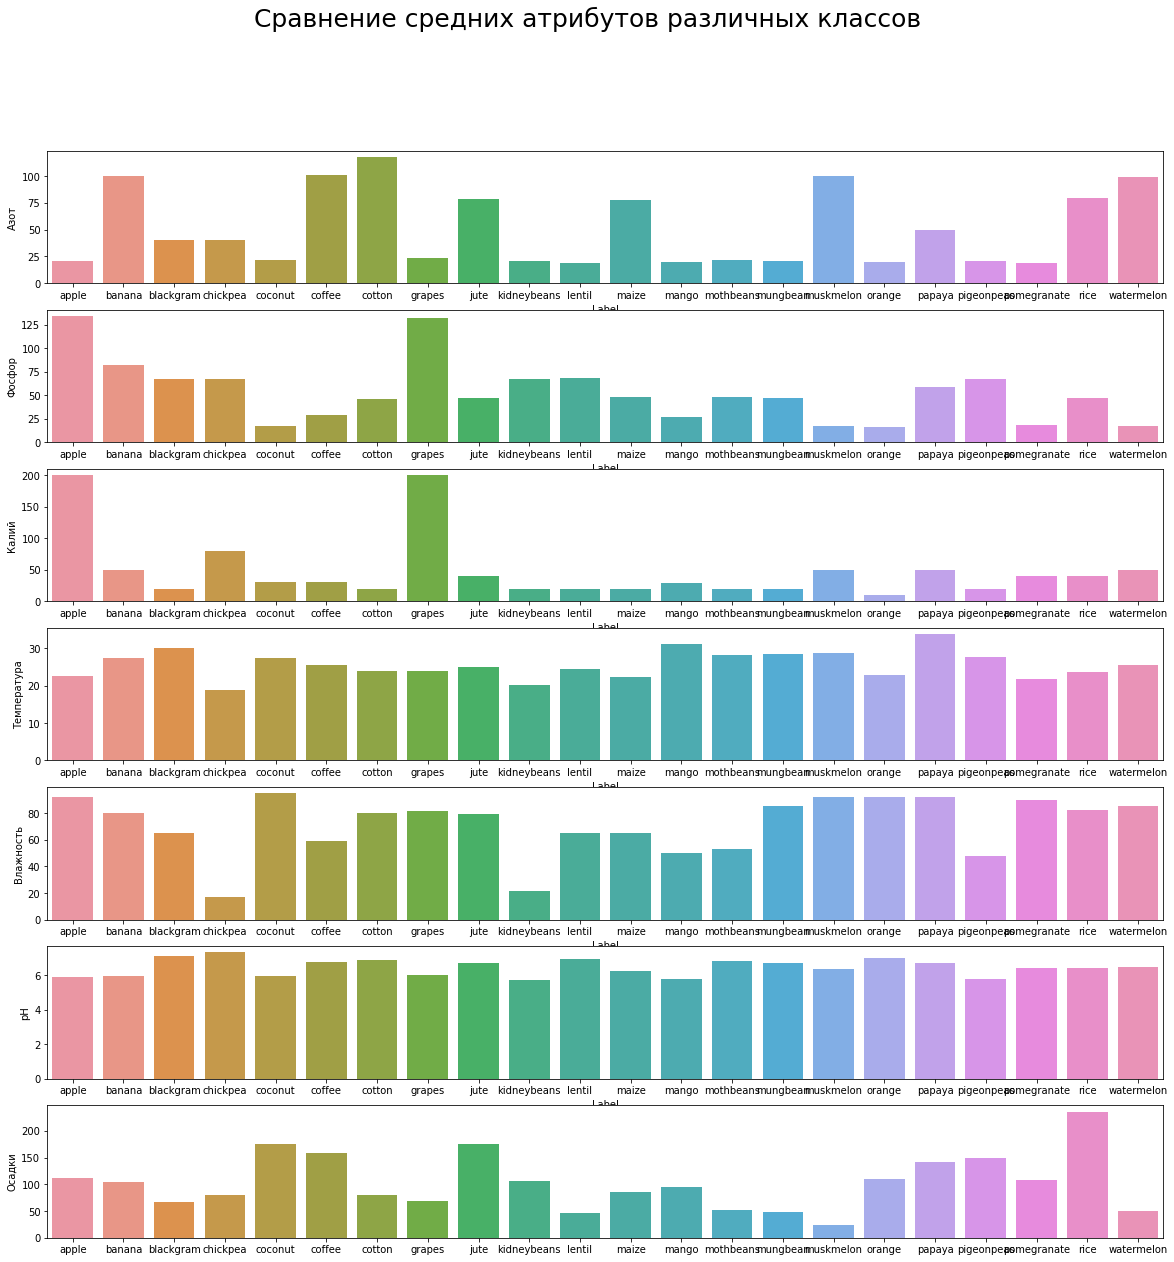

In [12]:
fig,ax=plt.subplots(7,1,figsize=(20,20))
for index,i in enumerate(grouped.columns[1:]):
    sns.barplot(data=grouped,x='Label',y=i,ax=ax[index])
    plt.suptitle("Сравнение средних атрибутов различных классов",size=25)
    plt.xlabel("")

Наблюдения:
Хлопку требуется больше всего азота.
Яблокам требуется больше всего фосфора.
Винограду требуется больше всего калия.
Папайя требует жаркого климата.
Кокос требует влажного климата.
Гороху требуется высокого pH в почве.
Рис требует огромного количества осадков.

Топ-5 более требовательных:

In [13]:
print(f'--------------------------------')
for i in grouped.columns[1:]:
    print(f'Top 5 Most {i} requiring crops:')
    print(f'--------------------------------')
    for j ,k in grouped.sort_values(by=i,ascending=False)[:5][['Label',i]].values:
        print(f'{j} --> {k}')
    print(f'-------------------------------')

--------------------------------
Top 5 Most Азот requiring crops:
--------------------------------
cotton --> 117.77
coffee --> 101.2
muskmelon --> 100.32
banana --> 100.23
watermelon --> 99.42
-------------------------------
Top 5 Most Фосфор requiring crops:
--------------------------------
apple --> 134.22
grapes --> 132.53
banana --> 82.01
lentil --> 68.36
chickpea --> 67.79
-------------------------------
Top 5 Most Калий requiring crops:
--------------------------------
grapes --> 200.11
apple --> 199.89
chickpea --> 79.92
watermelon --> 50.22
muskmelon --> 50.08
-------------------------------
Top 5 Most Температура requiring crops:
--------------------------------
papaya --> 33.7238587388
mango --> 31.2087701513
blackgram --> 29.9733396789
muskmelon --> 28.663065756
mungbean --> 28.5257747353
-------------------------------
Top 5 Most Влажность requiring crops:
--------------------------------
coconut --> 94.84427180610001
papaya --> 92.4033876826
muskmelon --> 92.3428019608999

Топ-5 менее требовательных:

In [14]:
print(f'--------------------------------')
for i in grouped.columns[1:]:
    print(f'Top 5 менее требовательных к {i}:')
    print(f'--------------------------------')
    for j ,k in grouped.sort_values(by=i)[:5][['Label',i]].values:
        print(f'{j} --> {k}')
    print(f'-------------------------------')

--------------------------------
Top 5 менее требовательных к Азот:
--------------------------------
lentil --> 18.77
pomegranate --> 18.87
orange --> 19.58
mango --> 20.07
pigeonpeas --> 20.73
-------------------------------
Top 5 менее требовательных к Фосфор:
--------------------------------
orange --> 16.55
coconut --> 16.93
watermelon --> 17.0
muskmelon --> 17.72
pomegranate --> 18.75
-------------------------------
Top 5 менее требовательных к Калий:
--------------------------------
orange --> 10.01
blackgram --> 19.24
lentil --> 19.41
cotton --> 19.56
maize --> 19.79
-------------------------------
Top 5 менее требовательных к Температура:
--------------------------------
chickpea --> 18.8728467519
kidneybeans --> 20.1150846851
pomegranate --> 21.837841721999997
maize --> 22.3892039102
apple --> 22.6309424132
-------------------------------
Top 5 менее требовательных к Влажность:
--------------------------------
chickpea --> 16.8604394237
kidneybeans --> 21.6053567295
pigeonpeas

Наблюдается сильная положительная корреляция между калием и фосфором:

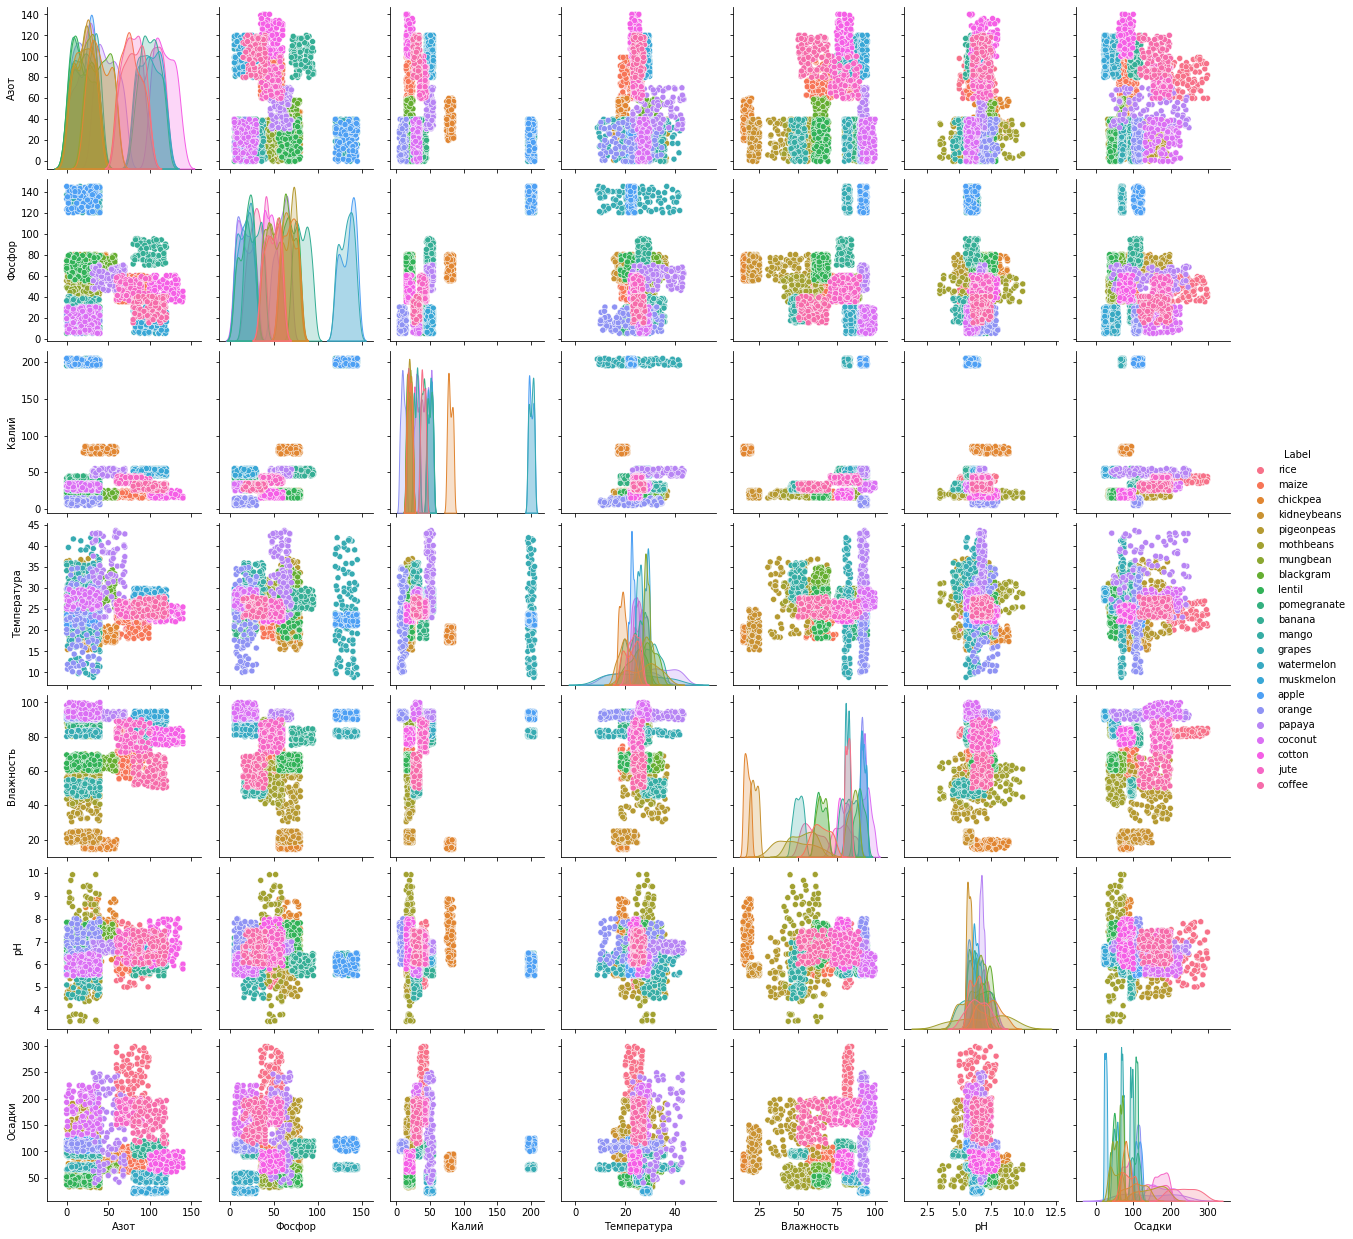

In [15]:
sns.pairplot(data=df,hue='Label')
plt.show()
#разделяем и группируем все данные через функцию pairplot

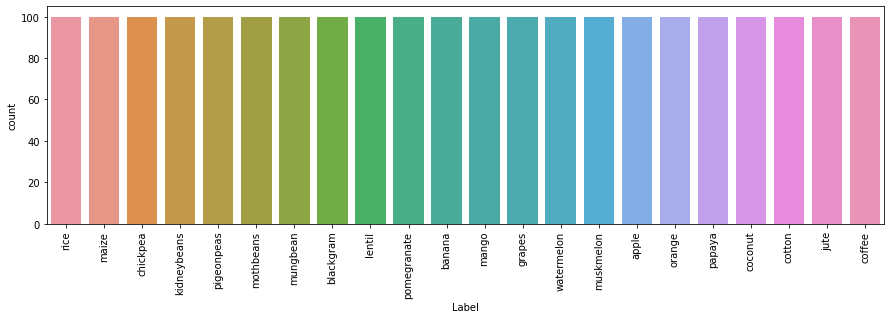

In [16]:
plt.figure(figsize=(15,4))
sns.countplot(data=df,x='Label')
plt.xticks(rotation = 90)
plt.show()

Разложение с использованием PCA:

In [17]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
df_pca=pca.fit_transform(df.drop(['Label'],axis=1))
df_pca=pd.DataFrame(df_pca)
fig = px.scatter(x=df_pca[0],y=df_pca[1],color=df['Label'],title="Разложение с использованием PCA:")
fig.show()

Объяснение разницы:

In [18]:
pca3=PCA(n_components=3)
df_pca3=pca3.fit_transform(df.drop(['Label'],axis=1))
df_pca3=pd.DataFrame(df_pca3)
fig = px.scatter_3d(x=df_pca3[0],y=df_pca3[1],z=df_pca3[2],color=df['Label'],title=f"Variance Explained : {pca3.explained_variance_ratio_.sum() * 100}%")
fig.show()

In [19]:
fig = px.scatter(x=df['Азот'],y=df['Фосфор'],color=df['Label'],title="Азот VS Фосфор")
fig.show()

In [20]:
fig = px.scatter(x=df['Фосфор'],y=df['Калий'],color=df['Label'],title="Фосфор VS Калий")
fig.show()

In [21]:
names = df['Label'].unique()

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Label']=encoder.fit_transform(df['Label'])
df.head()

Азот  Фосфор  Калий  Температура  Влажность        pH      Осадки  Label
0    90      42     43    20.879744  82.002744  6.502985  202.935536     20
1    85      58     41    21.770462  80.319644  7.038096  226.655537     20
2    60      55     44    23.004459  82.320763  7.840207  263.964248     20
3    74      35     40    26.491096  80.158363  6.980401  242.864034     20
4    78      42     42    20.130175  81.604873  7.628473  262.717340     20